# **Linear Regression**

### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

### **About Dataset**

In [2]:
#df = pd.read_csv("/content/Admission_Predict.csv")
df = pd.read_csv("/content/Real estate.csv")

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### **Data Visulization**

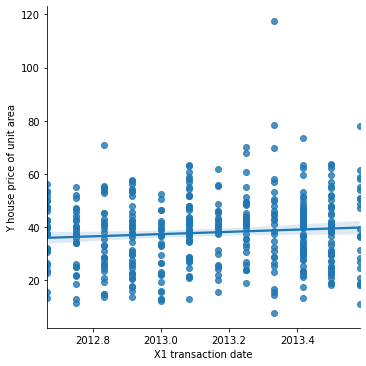

In [5]:
sns.lmplot(x='X1 transaction date',y ='Y house price of unit area', data=df)

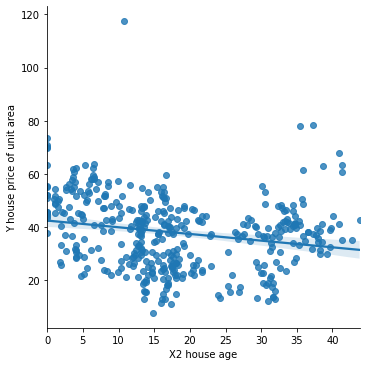

In [6]:
sns.lmplot(x='X2 house age',y ='Y house price of unit area', data=df)

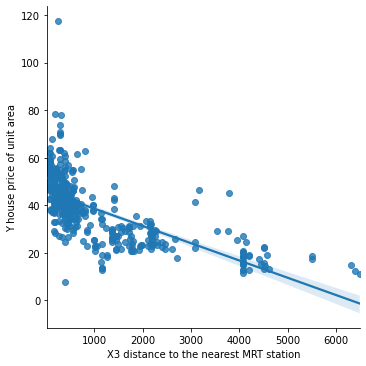

In [7]:
sns.lmplot(x='X3 distance to the nearest MRT station',y ='Y house price of unit area', data=df)

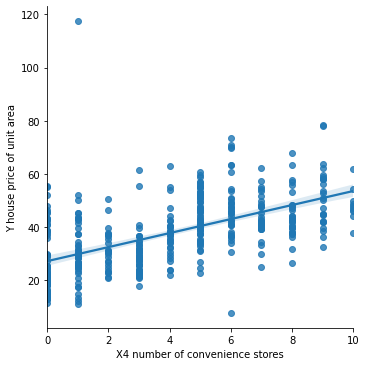

In [8]:
sns.lmplot(x='X4 number of convenience stores',y ='Y house price of unit area', data=df)

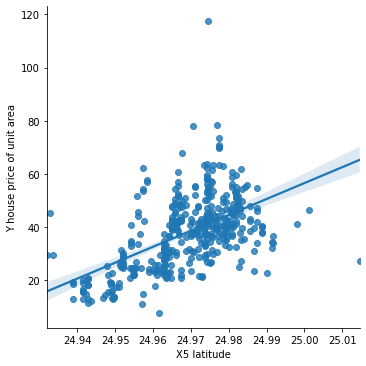

In [9]:
sns.lmplot(x='X5 latitude',y ='Y house price of unit area', data=df)

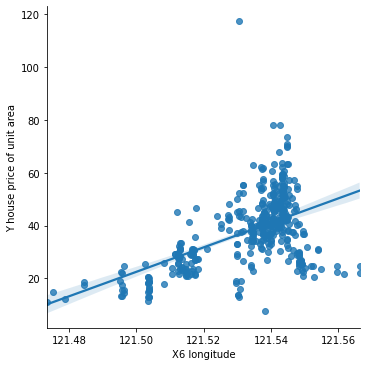

In [10]:
sns.lmplot(x='X6 longitude',y ='Y house price of unit area', data=df)

### **Spliting Data Into Train and Test Sets**

In [11]:
df.columns = [num for num in range(len(df.columns))]
df.head()

,0,1,2,3,4,5,6,7
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [12]:
#X_df = df.drop([0, 1, 3, 4, 5, 6, 7], axis = 1)
X_df = df.drop([0, 7], axis = 1)
Y_df = df[7]

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.33, random_state=42)

### **Training Linear Model**

##### **Model Instance**

In [14]:
model = LinearRegression()

##### **Fitting Data in Model**

In [15]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### **Print Coefficients of Model**

In [16]:
print("Coefficients: ", model.coef_)

Coefficients:  [ 5.78388390e+00 -2.41909429e-01 -5.34856166e-03  1.05112941e+00
  2.49847549e+02 -6.48114341e+01]


### **Model Prediction**

In [17]:
pred = model.predict(X_test)

### **Model Evaluation**

In [18]:
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, pred))
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, pred))
print("Root Mean Square Error:", np.sqrt(metrics.mean_squared_error(Y_test, pred)))

Mean Absolute Error: 6.0888760144072505
Mean Squared Error: 71.48570304941434
Root Mean Square Error: 8.454921823968235


Text(0, 0.5, 'Predicted Y')

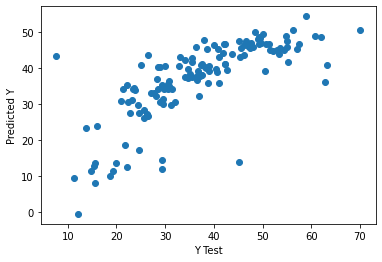

In [19]:
plt.scatter(Y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


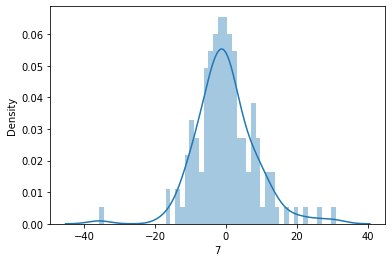

In [20]:
sns.distplot((Y_test-pred),bins=50)

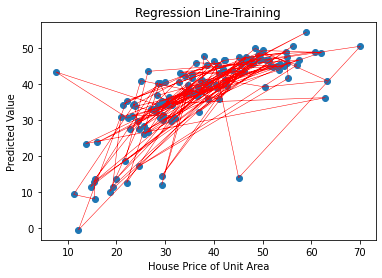

In [21]:
plt.title("Regression Line-Training")
plt.xlabel("House Price of Unit Area")
plt.ylabel("Predicted Value")
plt.plot(Y_test, pred, color='red', linewidth=0.5)
plt.scatter(Y_test,pred)
plt.show()